# Deep Regression

## 데이터 준비

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

c:\Users\PiusHwang\Anaconda3\envs\aicomp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

필요한 라이브러리 및 데이터를 불러옴. 
출력 값은 TARGET 속성으로 저장되도록

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 보스턴 주택 가격 데이터셋 구성
* 13개의 속성과 506개의 샘플로 구성됨
* 성능 향상, 수월한 최적화를 위해 표준 스케일링(Standard Scailng)을 통해 입력값 정규화

In [6]:
scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:, :-1] = scaler.transform(df.values[:, :-1]).round(4) 
# round(4)는 소숫점 4자리 밑은 반올림 하겠다는 뜻

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-0.4198,0.2848,-1.2879,-0.2726,-0.1442,0.4137,-0.1200,0.1402,-0.9828,-0.6666,-1.4590,0.4411,-1.0756,24.0
1,-0.4173,-0.4877,-0.5934,-0.2726,-0.7403,0.1943,0.3672,0.5572,-0.8679,-0.9873,-0.3031,0.4411,-0.4924,21.6
2,-0.4173,-0.4877,-0.5934,-0.2726,-0.7403,1.2827,-0.2658,0.5572,-0.8679,-0.9873,-0.3031,0.3964,-1.2087,34.7
3,-0.4168,-0.4877,-1.3069,-0.2726,-0.8353,1.0163,-0.8099,1.0777,-0.7529,-1.1061,0.1130,0.4162,-1.3615,33.4
4,-0.4125,-0.4877,-1.3069,-0.2726,-0.8353,1.2286,-0.5112,1.0777,-0.7529,-1.1061,0.1130,0.4411,-1.0265,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.4132,-0.4877,0.1157,-0.2726,0.1581,0.4393,0.0187,-0.6258,-0.9828,-0.8032,1.1765,0.3872,-0.4181,22.4
502,-0.4152,-0.4877,0.1157,-0.2726,0.1581,-0.2345,0.2889,-0.7166,-0.9828,-0.8032,1.1765,0.4411,-0.5008,20.6
503,-0.4134,-0.4877,0.1157,-0.2726,0.1581,0.9850,0.7974,-0.7737,-0.9828,-0.8032,1.1765,0.4411,-0.9830,23.9
504,-0.4078,-0.4877,0.1157,-0.2726,0.1581,0.7257,0.7370,-0.6684,-0.9828,-0.8032,1.1765,0.4032,-0.8653,22.0


* 정규화(regression)을 하는 이유는 날 것 그대로의 값을 활용하여 학습을 수행하기위함
* 이러한 경우 각 col의 값이 다른 범위와 분포를 갖기 때문에 신경망이 이것을 학습할 떄 어려움을 겪을 수 있음.
* 잘 학습된 신경망에서는 이러한 각 열의 특징에 따라 알맞은 계수(coefficient)곱해주어 상쇄가능하지만, 처음 학습하는 신경망 입장에서는 잘 정규화된 데이터셋을 배우는 것에 비해 어려운 일이 될 수 있음
* 적절한 <font color='red'>**정규화(Regression) 과정**</font>을 통해 신경망의 최적화를 수월하게 할 수 있음

# 정규화 방법
* 표준 스케일링(Standard Scailing), 최소/최대 스케일링(min/max Scailing) 등
* 정규화를 적용하기에 앞서 데이터셋 분포의 특징을 파악하고 어떤 정규화 방법을 사용할지 결정해야 함
* 보스턴 주택 가격 데이터셋의 각 열이 정규 분포(normal distribution)를 따른다고 가정하고 표준 스케일링을 적용함


# 학습 코드 구현

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

c:\Users\PiusHwang\Anaconda3\envs\aicomp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
data = torch.from_numpy(df.values).float()
x = data[:, :-1].to(device)
y = data[:, -1:].to(device)

In [11]:
n_epochs = 200000
learning_rate = 1e-4
print_interval = 10000

# 심층 신경망(Deep Neural Network) 정의

In [12]:
input_dim = x.size(-1)
output_dim = y.size(-1)

In [13]:
class MyDNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        super(MyDNN, self).__init__()

        self.linear1 = nn.Linear(self.input_dim, 3)
        self.linear2 = nn.Linear(3, 3)
        self.linear3 = nn.Linear(3, 3)
        self.linear4 = nn.Linear(3, output_dim)
        self.act = nn.ReLU()

    def forward(self, x):
        h = self.act(self.linear1(x))
        h = self.act(self.linear2(h))
        h = self.act(self.linear3(h))
        y = self.linear4(h) # y = (batch_size, output_dim)
        
        return y

model = MyDNN(input_dim, output_dim).to(device)
print(model)


MyDNN(
  (linear1): Linear(in_features=13, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=3, bias=True)
  (linear4): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)


In [14]:
from torchsummary import summary

summary(model, (503, 13))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 503, 3]              42
              ReLU-2               [-1, 503, 3]               0
            Linear-3               [-1, 503, 3]              12
              ReLU-4               [-1, 503, 3]               0
            Linear-5               [-1, 503, 3]              12
              ReLU-6               [-1, 503, 3]               0
            Linear-7               [-1, 503, 1]               4
Total params: 70
Trainable params: 70
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.07
Params size (MB): 0.00
Estimated Total Size (MB): 0.10
----------------------------------------------------------------


# 다른 모델 구성 방법

In [15]:
model = nn.Sequential(
    nn.Linear(x.size(-1), 3),
    nn.LeakyReLU(negative_slope=0.01),
    nn.Linear(3, 3),
    nn.LeakyReLU(negative_slope=0.01),
    nn.Linear(3, 3),
    nn.LeakyReLU(negative_slope=0.01),
    nn.Linear(3, 3),
    nn.LeakyReLU(negative_slope=0.01),
    nn.Linear(3, 1)
).to(device)

In [16]:
summary(model, x.size())

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 506, 3]              42
         LeakyReLU-2               [-1, 506, 3]               0
            Linear-3               [-1, 506, 3]              12
         LeakyReLU-4               [-1, 506, 3]               0
            Linear-5               [-1, 506, 3]              12
         LeakyReLU-6               [-1, 506, 3]               0
            Linear-7               [-1, 506, 3]              12
         LeakyReLU-8               [-1, 506, 3]               0
            Linear-9               [-1, 506, 1]               4
Total params: 82
Trainable params: 82
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 0.10
Params size (MB): 0.00
Estimated Total Size (MB): 0.12
-----------------------------------------------------

In [17]:
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [18]:
losses = []
for i in range(n_epochs):
    
    y_hat = model(x)
    loss = F.mse_loss(y_hat,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (i + 1) % print_interval == 0:
        print('epoches: {}/{}, loss: {:.4f}'.format(i+1, n_epochs, loss))

epoches: 10000/200000, loss: 9.5258
epoches: 20000/200000, loss: 9.0664
epoches: 30000/200000, loss: 9.0072
epoches: 40000/200000, loss: 8.7815
epoches: 50000/200000, loss: 8.7352
epoches: 60000/200000, loss: 8.7265
epoches: 70000/200000, loss: 8.7188
epoches: 80000/200000, loss: 8.7104
epoches: 90000/200000, loss: 8.7003
epoches: 100000/200000, loss: 8.6009
epoches: 110000/200000, loss: 8.4997
epoches: 120000/200000, loss: 8.4801
epoches: 130000/200000, loss: 8.4751
epoches: 140000/200000, loss: 8.4731
epoches: 150000/200000, loss: 8.4720
epoches: 160000/200000, loss: 8.4713
epoches: 170000/200000, loss: 8.4704
epoches: 180000/200000, loss: 8.4698
epoches: 190000/200000, loss: 8.4693
epoches: 200000/200000, loss: 8.4687


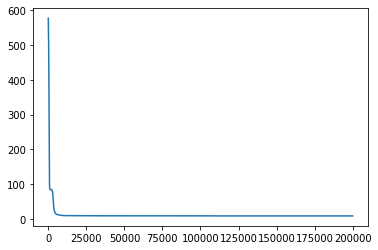

In [19]:
plt.plot(losses)

In [24]:
df = pd.DataFrame(torch.cat([y, y_hat], dim = 1).detach().numpy().to(device), columns=['y', 'y_hat'])

sns.pairplot(df, height = 5)
plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.